In [1]:
import sys
sys.path.append(r"C:\pythonprojects\calculas\venv\Lib\site-packages")
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/ashok/Downloads/tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

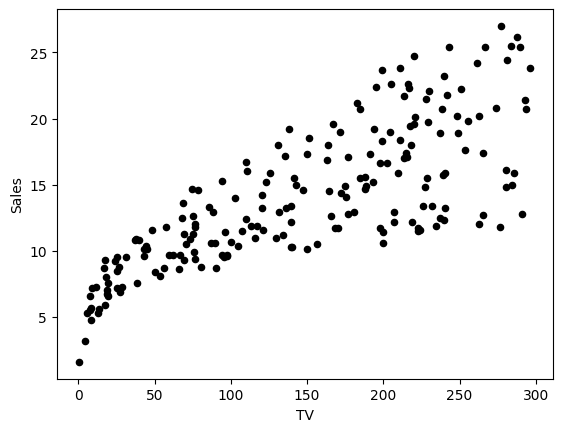

In [4]:
df.plot(x='TV', y='Sales', kind='scatter', c='black')  #here we are plotting the expense of marketing and the sales in X-axis and Y-axis respectively

In [14]:
X=df['TV']
Y=df['Sales']
m_numpy,b_numpy = np.polyfit(X,Y,1)  #here we are finding the slope and the b intercept of the straight line y=mx+b as we are passing degree 1 , using numpy polyfit
m_numpy
b_numpy

np.float64(7.032593549127696)

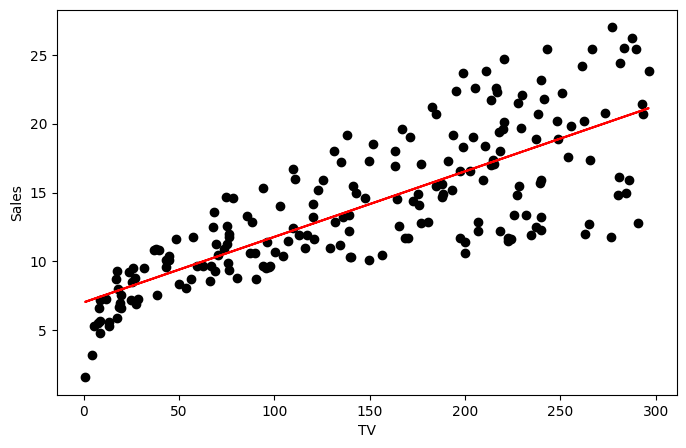

In [6]:
def plot_linear_regression(X, Y, x_label, y_label, m, b, X_pred=np.array([]), Y_pred=np.array([])):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(X, Y, 'o', color='black')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.plot(X, m*X + b, color='red')  #plotting the line
    # Plot prediction points (empty arrays by default - the predictions will be calculated later).
    ax.plot(X_pred, Y_pred, 'o', color='blue', markersize=8)

plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy)

In [7]:
def pred_sales(X,m,b):   #here we are just using the function formulae to predict the value of y using y = m*x + b
    Y = (m * X) + b
    return Y
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_sales(X_pred,m_numpy, b_numpy)    
Y_pred_numpy  #these are the predicted sales based on the marketing expense X_pred
    

array([ 9.40942557, 12.7369904 , 20.34285287])

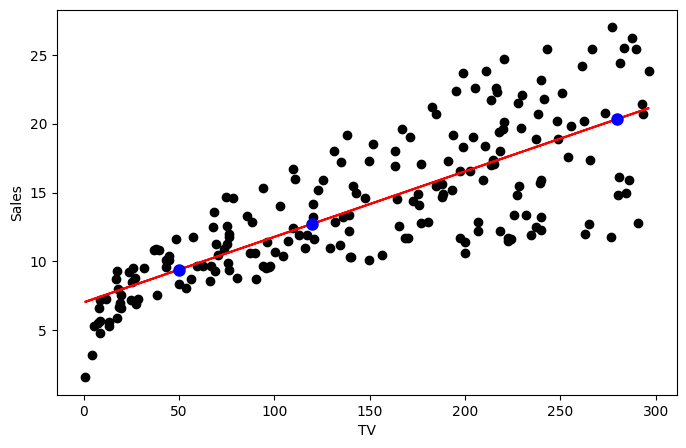

In [11]:
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy, X_pred, Y_pred_numpy)

In [ ]:
lr_sklearn  = LinearRegression()
X_reshaped = X.values[:,np.newaxis]  #here we are converting our expense value array into 2D array as the LinearRegression expects the data to have sample and feature property
Y_reshaped = Y.values[:,np.newaxis]
lr_sklearn.fit(X_reshaped,Y_reshaped)  #here X is the training samples and Y is the output to be obtained



In [16]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_
m_sklearn  #slope
b_sklearn  #intercept


np.float64(7.032593549127695)

In [18]:
#predicting using sk_learn
def make_prediction(x,lr_sklearn): 
    x_2D = x[:,np.newaxis]  #converting into 2D array
    y=lr_sklearn.predict(x_2D)
    return y
print('Prediction of sales based on marketing expense using sklearn is', make_prediction(X_pred,lr_sklearn))


Prediction of sales based on marketing expense using sklearn is [ 9.40942557 12.7369904  20.34285287]


In [19]:
#Linear Regression using Gradient Descent

#defining the cost function
def cost_function(x,y,m,b):
    return 1/(2*len(y)) * np.sum(((m*x+b)-y)**2)  #here m*x + b is the predicted value and y is the original value
    

In [20]:
def dEdm(m, b, X, Y): #partial derivative of the functio (mx+b - y)**2n  with respect to m
    res = 1/len(Y)*np.dot(m*X + b - Y, X) #np.dot does the summation internally
    return res


def dEdb(m, b, X, Y):  #partial derivative of the function (mx+b - y)**2  with respect to b
    ### START CODE HERE ### (~ 1 line of code)
    # Replace None writing the required expression fully.
    res = 1/len(Y) *np.sum((m*X + b) - Y)
    ### END CODE HERE ###

    return res

    


In [21]:
X_norm = (X - np.mean(X)) / np.std(X)
Y_norm = (Y - np.mean(Y)) / np.std(Y)


In [25]:
def gradient_descent(dedm,dedb,m,b,x,y,learning_rate,iterations):
    for i in range(iterations):
     m_new = m - learning_rate * dedm(m,b,x,y)
     b_new = b - learning_rate * dedb(m,b,x,y)
     m,b = m_new,b_new   
     print('Cost after iteration is:', cost_function(x,y,m,b))   
    return m,b
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, iterations = 10))    

Cost after iteration is: 2.4750000000000005
Cost after iteration is: 2.45025
Cost after iteration is: 2.4257475
Cost after iteration is: 2.401490025
Cost after iteration is: 2.3774751247499997
Cost after iteration is: 2.3537003735024995
Cost after iteration is: 2.330163369767475
Cost after iteration is: 2.3068617360698
Cost after iteration is: 2.283793118709102
Cost after iteration is: 2.260955187522011
(np.float64(0.9791767513915026), np.float64(4.521910375044022))


In [31]:
m_initial = 0
b_initial = 0
learning_rate = 1.2
iterations = 30
m_gd,b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, X_norm, Y_norm, learning_rate, iterations = 30)
#now as we got the slope and the intercept using gradient descent
#its time to predict the value
#and we must do normalization for fair feature contribution as well as smooth optimization
X_predicting_value_norm = (X_pred - np.mean(X)) / np.std(X)  #normalizing the training dataset
Y_prediction = (m_gd * X_predicting_value_norm) + b_gd
Y_prediction =  (Y_prediction * np.std(Y)) + np.mean(Y)  #denormalizing the predicted dataset
Y_prediction
print(f'so our model predicted the sales of {Y_prediction} number of TVs based on {X_pred} marketing expense')


Cost after iteration is: 3.9968028886505634e-17
Cost after iteration is: -1.3322676295501878e-17
Cost after iteration is: 1.9984014443252817e-17
Cost after iteration is: -1.5543122344752193e-17
Cost after iteration is: 1.3322676295501878e-17
Cost after iteration is: -1.5543122344752193e-17
Cost after iteration is: 6.661338147750939e-18
Cost after iteration is: -1.1102230246251566e-17
Cost after iteration is: 1.3322676295501878e-17
Cost after iteration is: -8.881784197001253e-18
Cost after iteration is: 6.661338147750939e-18
Cost after iteration is: 0.0
Cost after iteration is: -4.440892098500626e-18
Cost after iteration is: 4.440892098500626e-18
Cost after iteration is: -8.881784197001253e-18
Cost after iteration is: 1.3322676295501878e-17
Cost after iteration is: -1.5543122344752193e-17
Cost after iteration is: 1.1102230246251566e-17
Cost after iteration is: -8.881784197001253e-18
Cost after iteration is: 1.3322676295501878e-17
Cost after iteration is: -1.3322676295501878e-17
Cost aft